In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
digits = datasets.load_digits() # 8X8 크기의 손글씨 숫자 데이터 로드
features = StandardScaler().fit_transform(digits.data) # 특성 행렬을 표준화 처리
# 99%의 분산을 유지하도록 PCA 클래스 객체를 만듭니다.
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features) # PCA를 수행
print("원본 특성 개수:", features.shape[1]) # 결과를 확인
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


In [2]:
# 주성분에 투영된 처음 두 개의 특성을 사용해 산점도 출력
import matplotlib.pyplot as plt
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()
pca_nowhiten.components_.shape

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

(54, 64)

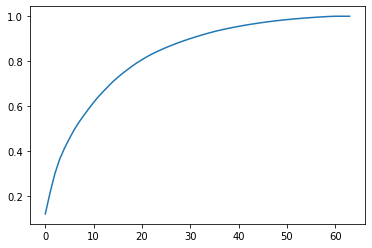

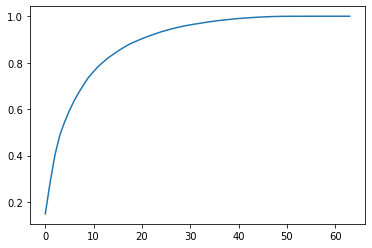

In [3]:
import numpy as np
np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))
pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#넘파이 cumsum()를 사용하여 분산을 누적하여 그래프 출력
#대략 30개의 주성분으로도 80% 이상의 분산을 유지

# 표준화하지 않은 원본 데이터를 사용합니다.(올바르게 분산으로 계산하기 위해서 원본 데이터를 PCA에 주입)
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [4]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
# 선형적으로 구분되지 않는 데이터를 만듭니다.
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
# 방사 기저 함수(radius basis function, RBF)를 사용하여 커널 PCA를 적용합니다.
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


In [5]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris() # 붓꽃 데이터셋을 로드합니다.
features = iris.data
target = iris.target
# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
print("원본 특성 개수:", features.shape[1]) # 특성 개수를 출력합니다
print("줄어든 특성 개수:", features_lda.shape[1])
#explained_variance_ratio_를 사용하여 각 성분이 설명하는 분산의 양을 확인
lda.explained_variance_ratio_

원본 특성 개수: 4
줄어든 특성 개수: 1


array([0.9912126])

In [6]:
lda = LinearDiscriminantAnalysis(n_components=None) # LDA를 만들고 실행
features_lda = lda.fit(features, target)
# 설명된 분산의 비율이 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0 # 설명된 분산의 초기값을 지정
    n_components = 0 # 특성 개수의 초깃값을 지정
    for explained_variance in var_ratio: # 각 특성의 설명된 분산을 순회
        total_variance += explained_variance # 설명된 분산 값을 누적
        n_components += 1 # 성분 개수를 카운트
        if total_variance >= goal_var: # 설명된 분산이 목표치에 도달하면
            break # 반복을 종료
    return n_components # 성분 개수를 반환
select_n_components(lda_var_ratios, 0.95) # 함수를 실행

1

In [7]:
from sklearn.decomposition import NMF
from sklearn import datasets
digits = datasets.load_digits() # 데이터 로드
features = digits.data # 특성 행렬을 로드
nmf = NMF(n_components=10, random_state=1) # NMF 생성
features_nmf = nmf.fit_transform(features) #학습
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [10]:
nmf.components_.shape

(10, 64)

In [20]:
np.all(nmf.components_ >= 0)

True

In [22]:
np.mean(features - np.dot(features_nmf, nmf.components_))

-0.20062043744127928

In [24]:
nmf_mu = NMF(n_components = 10, solver='mu', random_state=1)

In [25]:
features_nmf_mu = nmf_mu.fit_transform(features)

In [38]:
np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_))

-5.0104640357121255

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np
digits = datasets.load_digits() # 데이터 로드
features = StandardScaler().fit_transform(digits.data) # 특성 행렬을 표준화 처리
features_sparse = csr_matrix(features) # 희소 행렬 생성
tsvd = TruncatedSVD(n_components=10) # TSVD 객체 생성
# 희소 행렬에 TSVD를 적용합니다.
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
print("원본 특성 개수:", features_sparse.shape[1]) # 결과 출력
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])
# 처음 세 개의 성분이 설명하는 분산의 비율 합
tsvd.explained_variance_ratio_[0:3].sum()

원본 특성 개수: 64
줄어든 특성 개수: 10


0.30039385389879836

In [31]:
# 특성 개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)
tsvd_var_ratios = tsvd.explained_variance_ratio_ # 설명된 분산을 리스트에 저장
def select_n_components(var_ratio, goal_var):
    total_variance = 0.0 # 설명된 분산을 초기화
    n_components = 0 # 특성 개수를 초기화
    for explained_variance in var_ratio: # 특성의 설명된 분산을 순환 .
        total_variance += explained_variance # 설명된 분산을 누적
        n_components += 1 # 성분 개수를 카운트
        # 설명된 분산의 목표에 도달하면 반복을 마칩니다.
        if total_variance >= goal_var:
            break
    return n_components # 성분 개수를 반환
select_n_components(tsvd_var_ratios, 0.95) # 함수 실행

40

In [39]:
features = digits.data - np.mean(digits.data, axis=0)
pca = PCA(n_components=40, random_state=1)
features_pca = pca.fit_transform(features)
tsvd = TruncatedSVD(n_components=40, random_state=1)
features_tsvd = tsvd.fit_transform(features)


In [40]:
np.max(np.abs(features_pca - features_tsvd))

0.002010962081248735